# Машинное обучение, МАЕ РЭШ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 01.12.2022

Дедлайн: 23:59MSK 09.12.2022


### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

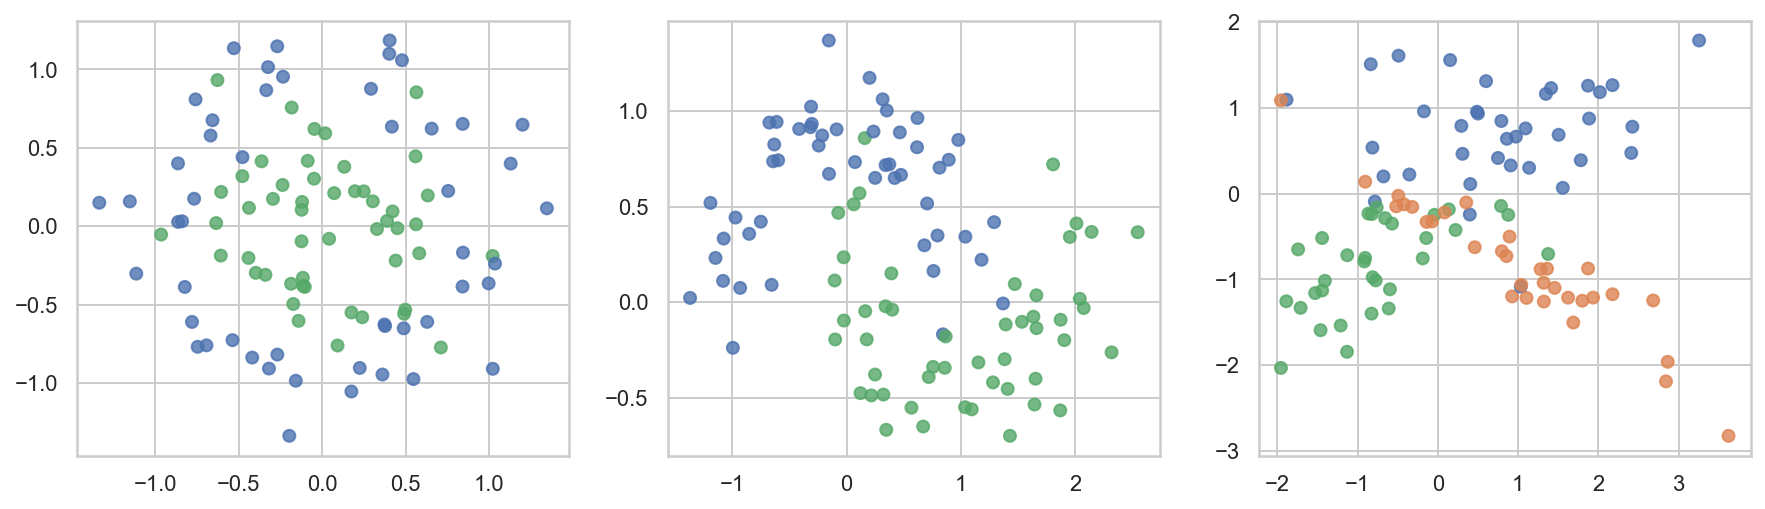

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1.5 балла)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax=None, title=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(X = np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
        cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
    else:
        ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
        ax.set_title(title)

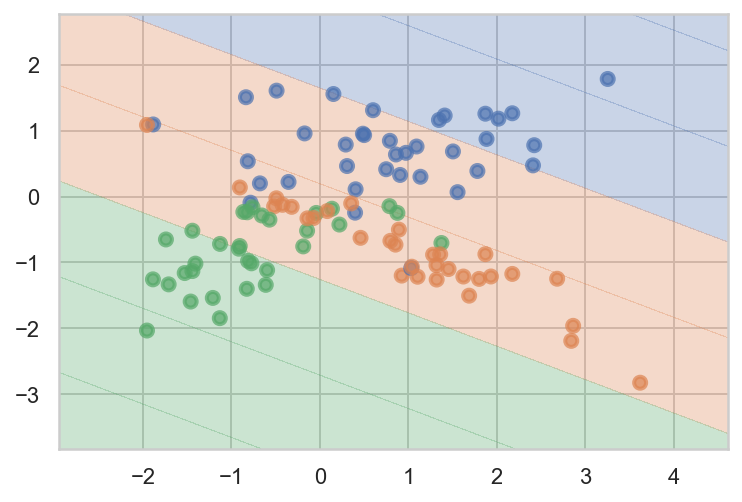

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

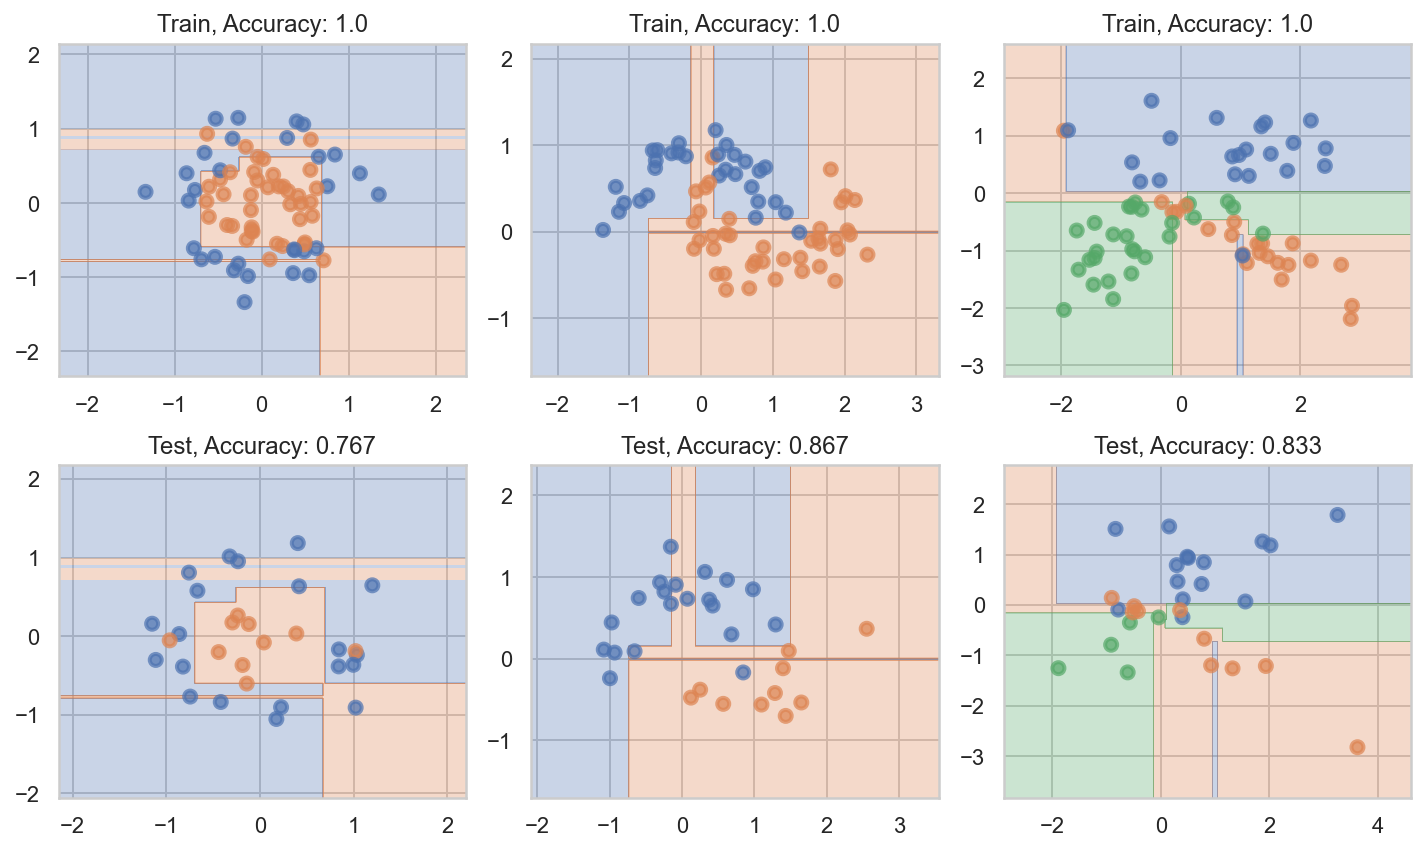

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
splitted = [train_test_split(x[0], x[1], test_size=0.3, shuffle=True, random_state=42) for x in datasets]
train_datasets = [(x[0], x[2]) for x in splitted]
test_datasets = [(x[1], x[3]) for x in splitted]

fig, axes = plt.subplots(2, 3, figsize = (10, 6))

for i in range(len(train_datasets)):
    X_train, y_train = train_datasets[i]
    X_test, y_test = test_datasets[i]
    clfTree = DecisionTreeClassifier()
    clfTree.fit(X_train, y_train)
    y_pred_train = clfTree.predict(X_train)
    y_pred_test = clfTree.predict(X_test)
    acc_train = metrics.accuracy_score(y_true=y_train, 
                           y_pred=y_pred_train)
    acc_test = metrics.accuracy_score(y_true=y_test,
                           y_pred=y_pred_test)
    plot_surface(clfTree, X_train, y_train, ax=axes[0,i],
                 title = f'Train, Accuracy: {np.round(acc_train, 3)}')
    plot_surface(clfTree, X_test, y_test, ax=axes[1,i],
                 title = f'Test, Accuracy: {np.round(acc_test, 3)}')
    plt.tight_layout()

__Ответ:__ Сильно

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
from sklearn.model_selection import KFold

In [10]:
max_depth = [2, 5, 10]
min_samples_leaf = [1, 3, 5]

In [11]:
kfd = KFold(n_splits=5, shuffle=True, random_state=10)
max_depth = [2, 5]
min_samples_leaf = [1, 3]
param_grid = [(x, y) for x in max_depth for y in min_samples_leaf]

def search_grid(kfd, train_dataset, param_grid, plot=True):
    fig, axes = plt.subplots(nrows=len(param_grid),ncols=2,
                             figsize=(6,10))
    plt.ion()
    results = {}
    for k, (max_depth, min_samples_leaf) in enumerate(param_grid):
        accuracy_train_list = []
        accuracy_val_list = []
        for train_idx, test_idx in kfd.split(train_dataset[0]):
            Xi_train, Xi_val = train_dataset[0][train_idx], train_dataset[0][test_idx]
            yi_train, yi_val = train_dataset[1][train_idx], train_dataset[1][test_idx]
            clf=DecisionTreeClassifier(
                max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(Xi_train, yi_train)
            yi_pred_train = clf.predict(Xi_train)
            yi_pred_val = clf.predict(Xi_val)
            accuracy_train = np.sum(yi_train == yi_pred_train)/len(yi_train)
            accuracy_val = np.sum(yi_val == yi_pred_val)/len(yi_val)
            if k == 0:
                plot_surface(clf, Xi_train, yi_train, ax=axes[k, 0],
                            title=f'Train\nmax_depth:{max_depth}, min_samples_leaf:{min_samples_leaf}')
                plot_surface(clf, Xi_val, yi_val, ax=axes[k,1],
                            title=f'Validation\nmax_depth:{max_depth}, min_samples_leaf:{min_samples_leaf}')
            else:
                plot_surface(clf, Xi_train, yi_train, ax=axes[k, 0],
                             title=f'max_depth:{max_depth}, min_samples_leaf:{min_samples_leaf}')
                plot_surface(clf, Xi_val, yi_val, ax=axes[k, 1],
                             title=f'max_depth:{max_depth}, min_samples_leaf:{min_samples_leaf}')
            accuracy_train_list.append(accuracy_train)
            accuracy_val_list.append(accuracy_val)
        results[k] = {'mean_accuracy_train': np.mean(accuracy_train_list),
                      'mean_accuracy_val': np.mean(accuracy_val_list),
                      'max_depth': max_depth,
                      'min_samples_leaf': min_samples_leaf}
    plt.tight_layout()
    # find best
    best_key, best_accuracy = 0, 0
    for key, item in results.items():
        if item['mean_accuracy_val'] > best_accuracy:
            best_accuracy = item['mean_accuracy_val']
            best_key = key
    for key in results.keys():
        ec, fc = (0.5, 0.5, 0.5), (0.5, 0.8, 0.8)
        if key == best_key:
            ec, fc = (1., 0.5, 0.5), (1., 0.8, 0.8)
        axes[key, 1].text(-2, 1.5, s = f'Mean Accuracy:{np.round(results[key]["mean_accuracy_val"],2)}',
                            size=10,bbox=dict(boxstyle="square",ec=ec, fc=fc))
        axes[key, 0].text(-2, 1.5, s = f'Mean Accuracy:{np.round(results[key]["mean_accuracy_train"],2)}',
                            size=10,bbox=dict(boxstyle="square",ec=ec, fc=fc))
    return results, results[best_key]

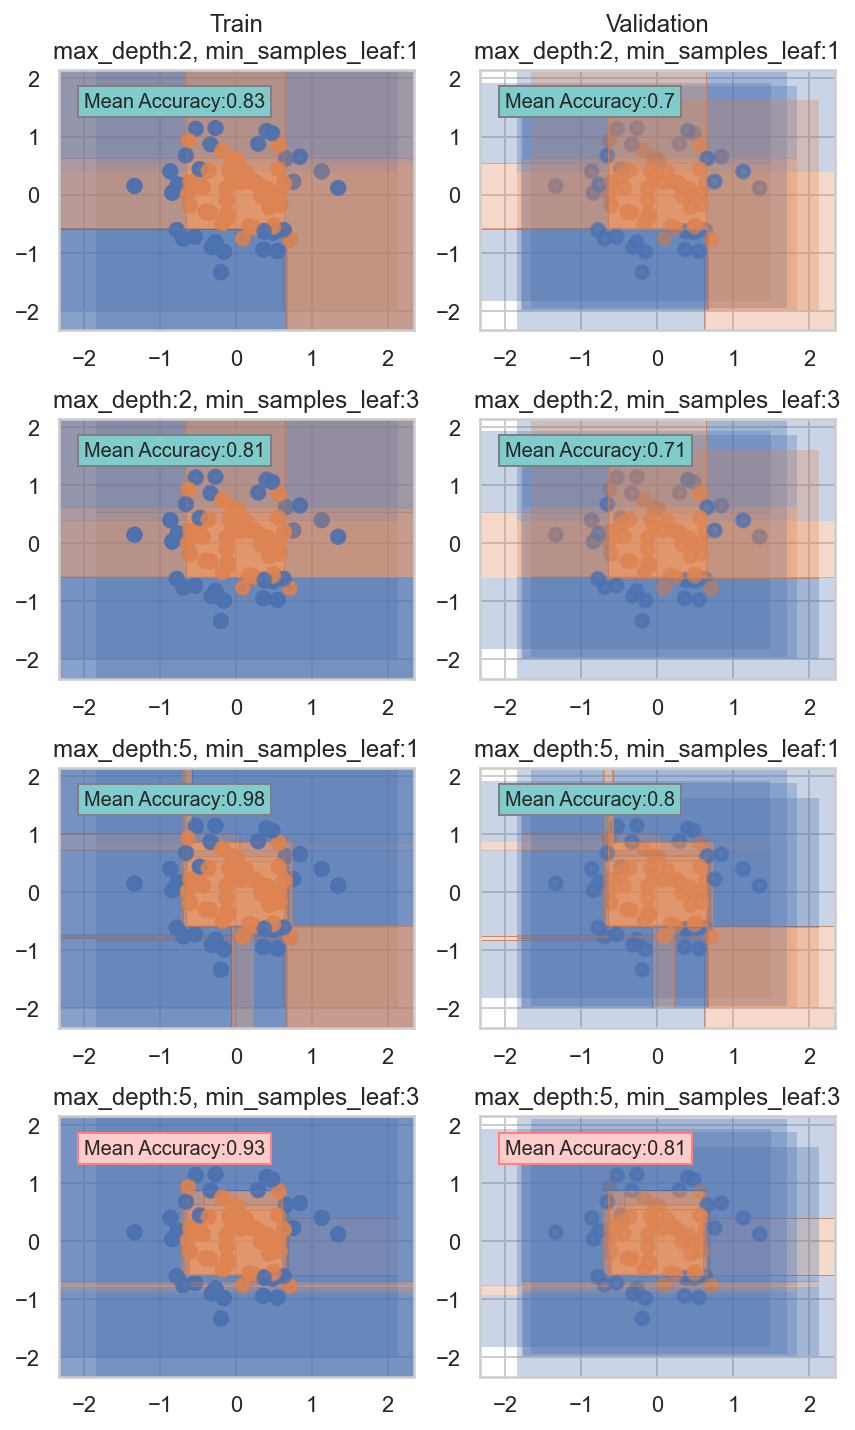

In [12]:
results, best = search_grid(kfd=kfd, train_dataset=train_datasets[0], param_grid=param_grid)

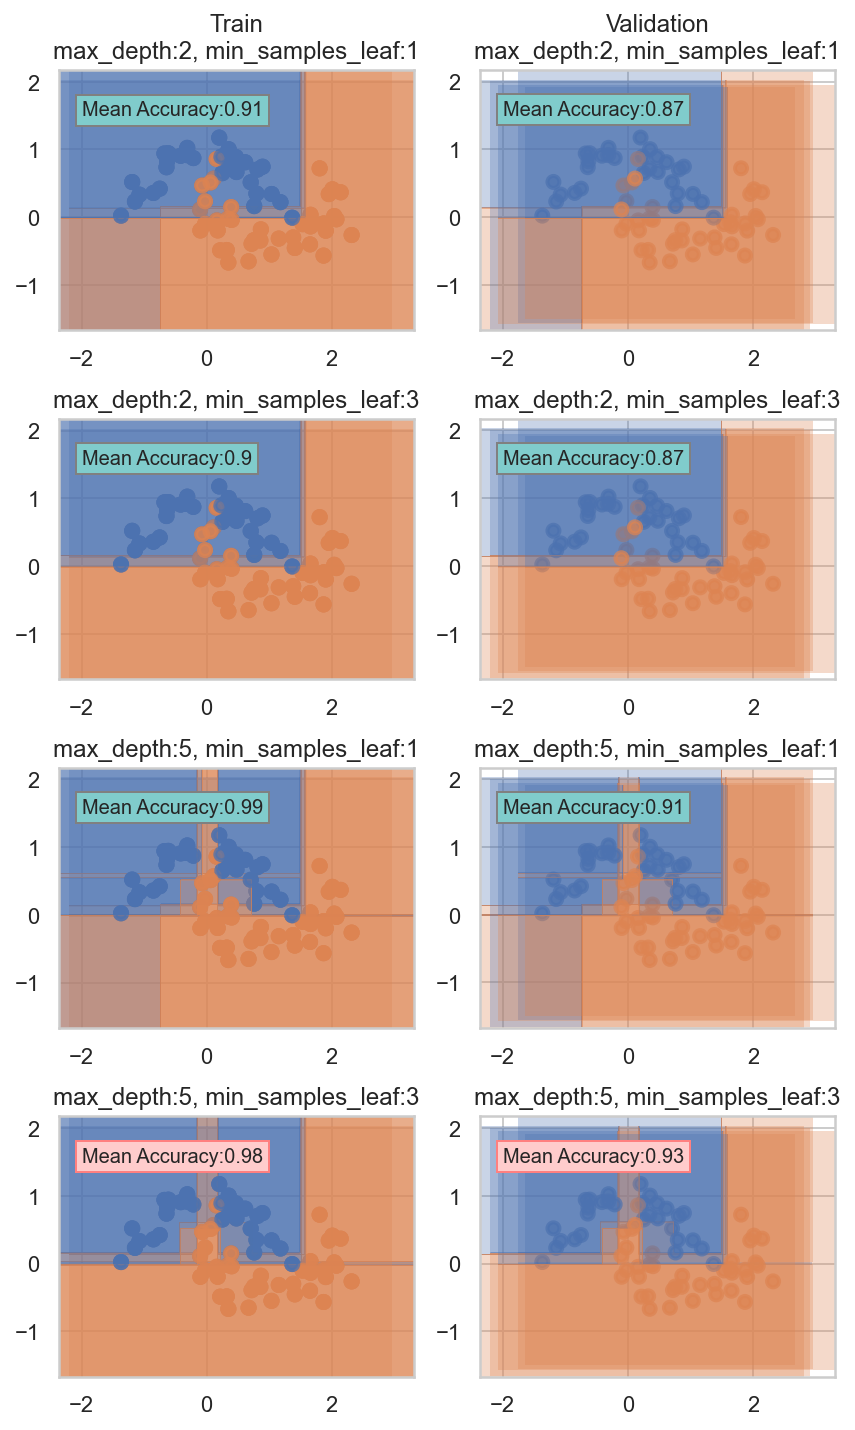

In [14]:
results, best = search_grid(
    kfd=kfd, train_dataset=train_datasets[1], param_grid=param_grid)

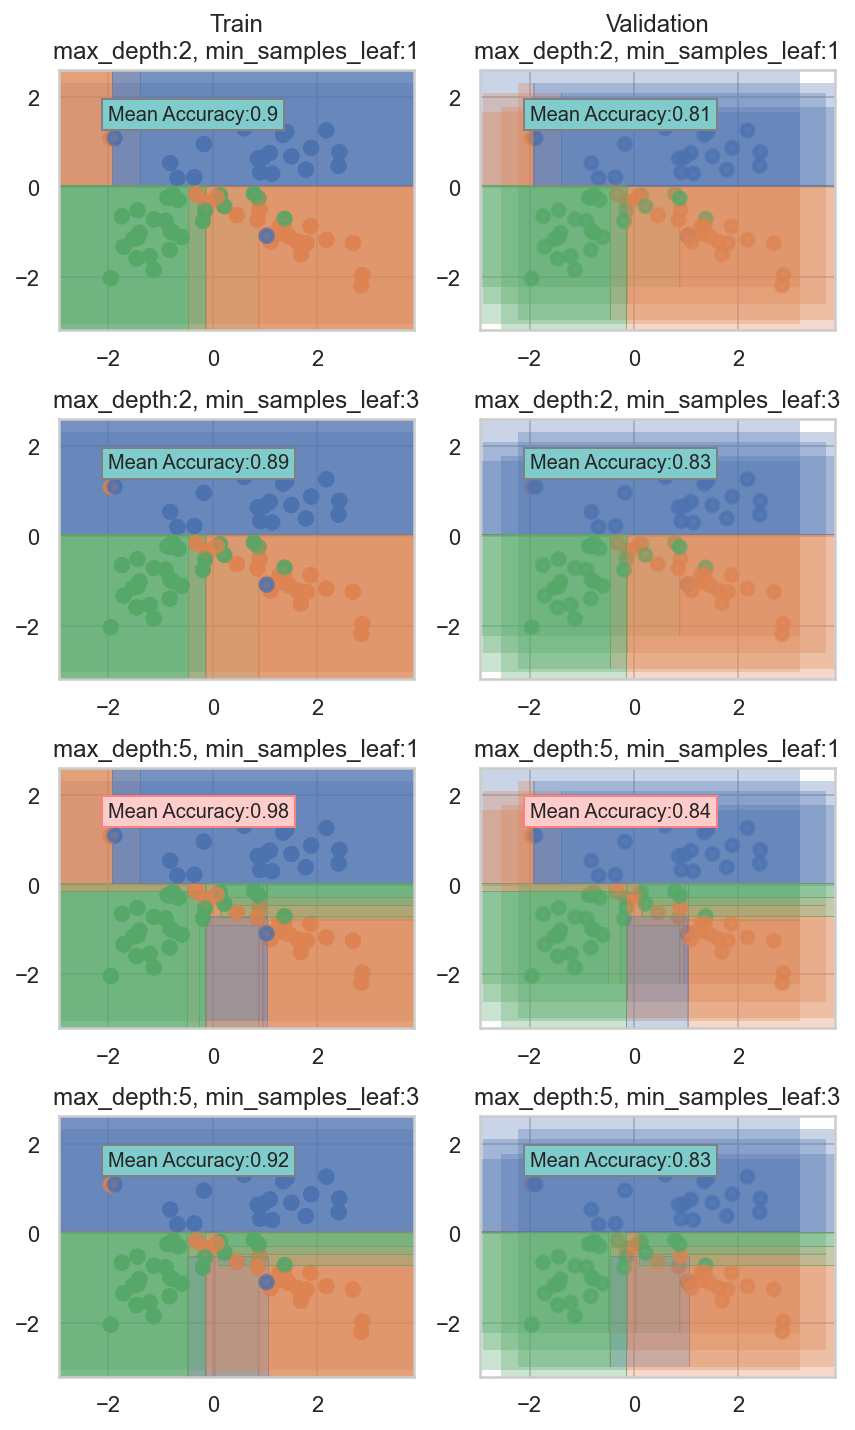

In [15]:
results, best = search_grid(
    kfd=kfd, train_dataset=train_datasets[2], param_grid=param_grid)

__Ответ:__ Для датасетов 2 и 3 (moons, classification) меняются несильно, потому что достаточно всего нескольких сплитов, чтобы провести большую часть классификации. Для первого датасета (circles) меняются сильно, так как требуется болльше сплитов, чтобы выделить круг внутри.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (2 балла)__

Реализуйте функцию find_best_split из модуля hw5code.py

Демонстрация для real фичей

In [22]:
import hw5code
from collections import Counter
data = pd.read_csv('students.csv')
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])
tree = hw5code.DecisionTree(feature_types=['real']*X.shape[0],
                            max_depth=3, min_samples_leaf=2, min_samples_split=2)
tree.fit(X, y)
y_pred = tree.predict(X)
acc = np.sum(y_pred == y)/len(y)
print(acc)


0.9689922480620154


__Задание 4. (1 балл)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [19]:
def H_gini(R, y):
    yR = np.array(y[R])
    pk = np.array([np.sum(yR == k)/len(yR) for k in set(yR)])
    return pk @ (1-pk)

def winner(x):
        return Counter(x).most_common(1)[0][0]

Rm = list(range(X.shape[0]))
coords = [(j, X[s, j]) for s in range(X.shape[0]) for j in range(X.shape[1])]
coords = [(j, s) for (j, s) in coords if (
    s > np.min(X[:, j])) and (s < np.max(X[:, j]))]
coords = list(set(coords))
scores_gini = []
y_class = []
for j, s in coords:
    Rl = np.argwhere(X[:, j] < s).flatten()
    Rr = np.argwhere(X[:, j] >= s).flatten()
    y_class.append(winner(y[Rr]))
    H_Rr = H_gini(Rr, y)
    H_Rl = H_gini(Rl, y)
    wl, wr = len(Rl)/len(Rm), len(Rr)/len(Rm)
    score = - wl * H_Rl - wr * H_Rr
    scores_gini.append(score)

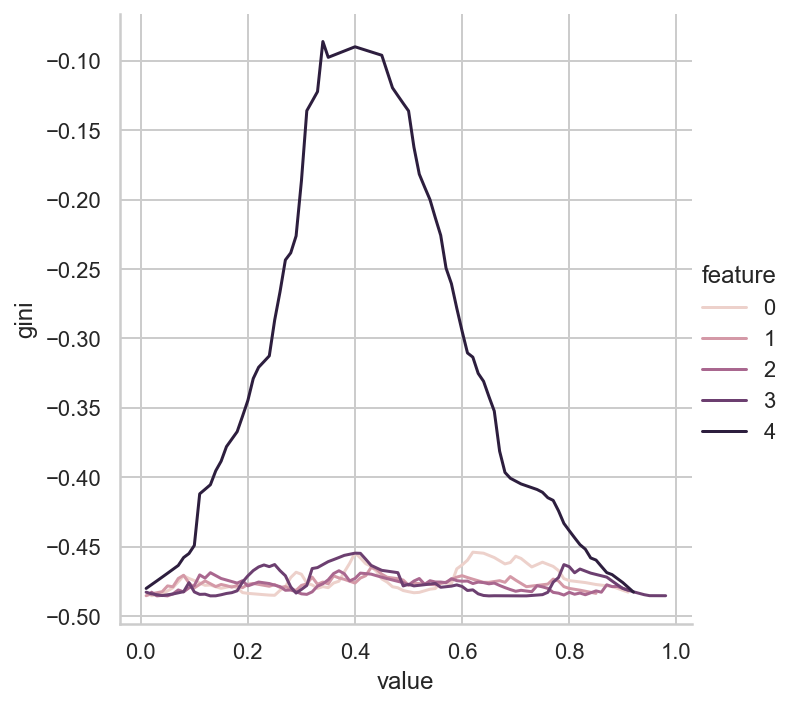

In [20]:
res = pd.DataFrame({'feature': [x[0] for x in coords],
                    'value': [x[1] for x in coords],
                    'gini': scores_gini,
                    'y_class': y_class})
sns.relplot(data=res, x = 'value', y = 'gini',
            hue='feature', kind='line')

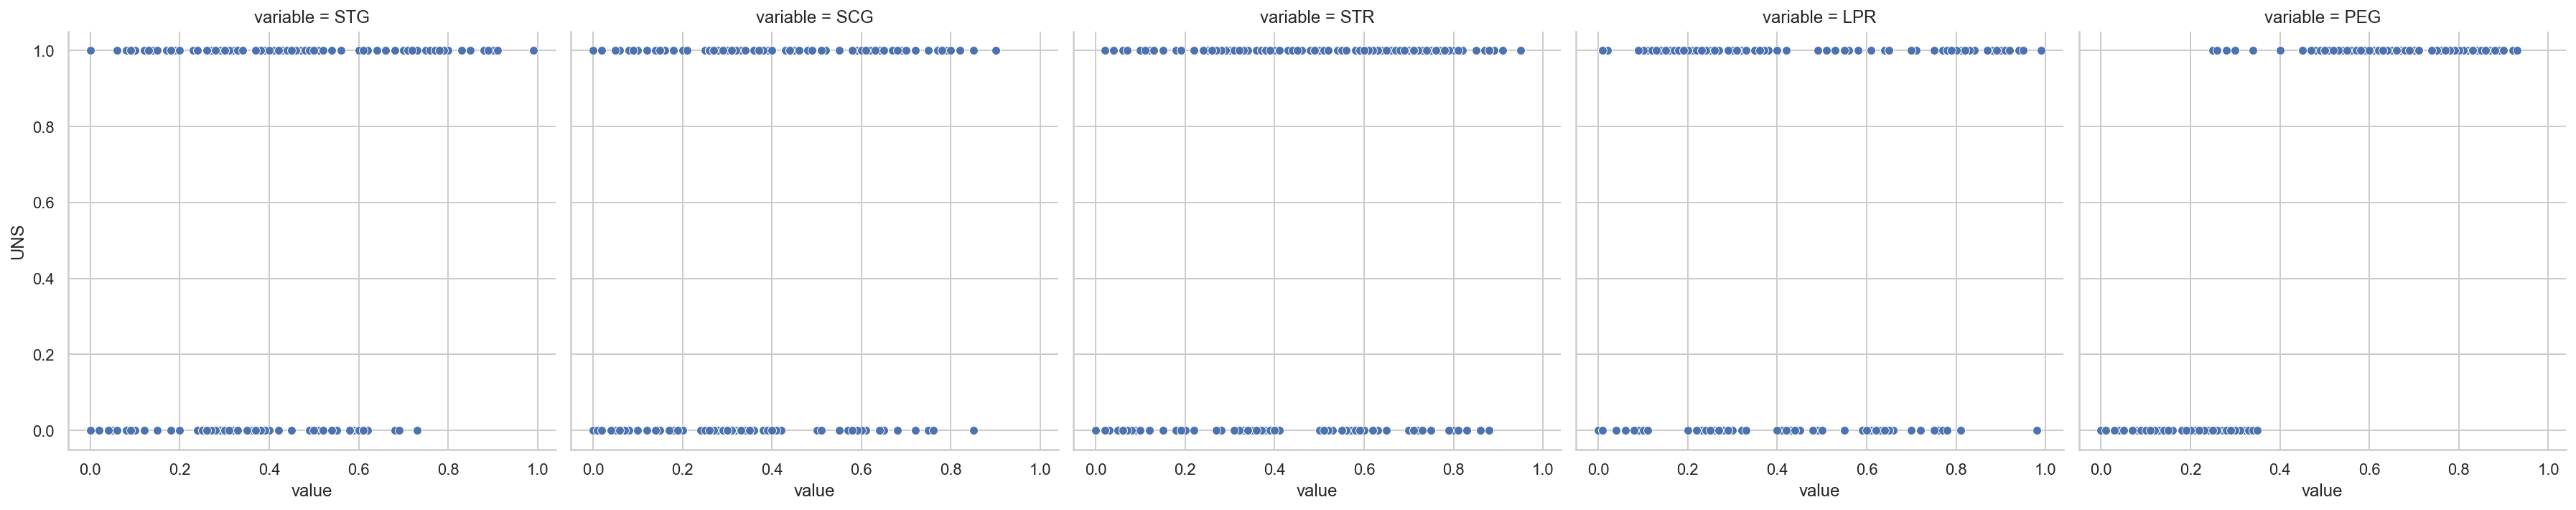

In [21]:
sns.relplot(data=pd.melt(data, id_vars='UNS'), 
            x='value', y='UNS',
            col='variable', kind = 'scatter')

__Задание 5. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Нужно делить по признаку PEG 
    $$
    PEG \geq 0.4
    $$
Кривая Gini имеет пик в значении, по которому стоит делить. 
- Коэффициент Gini -- коэффициент неравенства классов, соответственно, чем меньше Gini, тем меньше неравенство. Следовательно, в точке по которой стоит делить неравенство в листьях минимальное, а значение $(-1) \times $ Gini оказывается максимальным.
- Соответственно, для фичей, по которым выборку делить невозможно, кривые джини выглядят как горизонтальные прямые, то есть Gini выглядит почти как константа

__Задание 6. (2 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mushroom = pd.read_table('agaricus-lepiota.data', sep=',')
X = mushroom.iloc[:, 1:]
y = mushroom.iloc[:, 0]
y[y == 'e'] = 1
y[y == 'p'] = 0
y = np.array(y)
le = LabelEncoder()
X = np.apply_along_axis(le.fit_transform, axis=0, arr=X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True,
                                                    random_state=10, stratify=y)


In [28]:
tree = hw5code.DecisionTree(feature_types=['categorical']*X_train.shape[1],
                            max_depth=2, min_samples_leaf=10,
                            min_samples_split=10)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
print('Test Accuracy: ', np.sum(y_pred_test == y_test)/len(y_test))

Test Accuracy:  0.9950763170851797


In [29]:
tree._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': array([1, 2, 4, 6, 7, 8]),
 'left_child': {'type': 'terminal', 'class': 0},
 'right_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': array([5]),
  'left_child': {'type': 'terminal', 'class': 0},
  'right_child': {'type': 'terminal', 'class': 1}}}

__Задание 8. (бонус, 2 балла)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце).

In [33]:
from tqdm import tqdm

In [86]:
tt = np.array(pd.read_table('tic-tac-toe.data', sep=','))
X = tt[:, :-1]
y = tt[:, -1]
y[y == 'positive'] = 1
y[y == 'negative'] = 0
y = np.array(y)
le = LabelEncoder()
X = np.apply_along_axis(le.fit_transform, axis=0, arr=X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True,
                                                    random_state=10, stratify=y)

In [87]:
tree = hw5code.DecisionTree(feature_types=['categorical']*X_train.shape[1])
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Test Accuracy w/o restrictions: ', 
      np.sum(y_pred == y_test)/len(y_test))

Test Accuracy w/o restrictions:  0.9436325678496869


In [100]:
mdepth = np.arange(1, 10, 1)
mleaf = np.arange(2, 100, 25)
msplit = np.arange(2, 100, 25)
params = [(x, y, z) for x in mdepth for y in mleaf for z in msplit]

In [101]:
accuracy = []
for max_depth, min_samples_leaf, min_samples_split in tqdm(params):
    tree = hw5code.DecisionTree(feature_types=['categorical']*X_train.shape[1],
                            max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                            min_samples_split=min_samples_split)
    tree.fit(X_train, y_train)
    y_pred_test = tree.predict(X_test)
    acc = np.sum(y_pred_test == y_test)/len(y_test)
    accuracy.append(acc)

100%|██████████| 144/144 [00:01<00:00, 72.33it/s]


In [102]:
output = pd.DataFrame({'max_depth': [x[0] for x in params],
 'min_samples_leaf': [x[1] for x in params],
 'min_samples_split': [x[2] for x in params],
 'test_accuracy': accuracy})

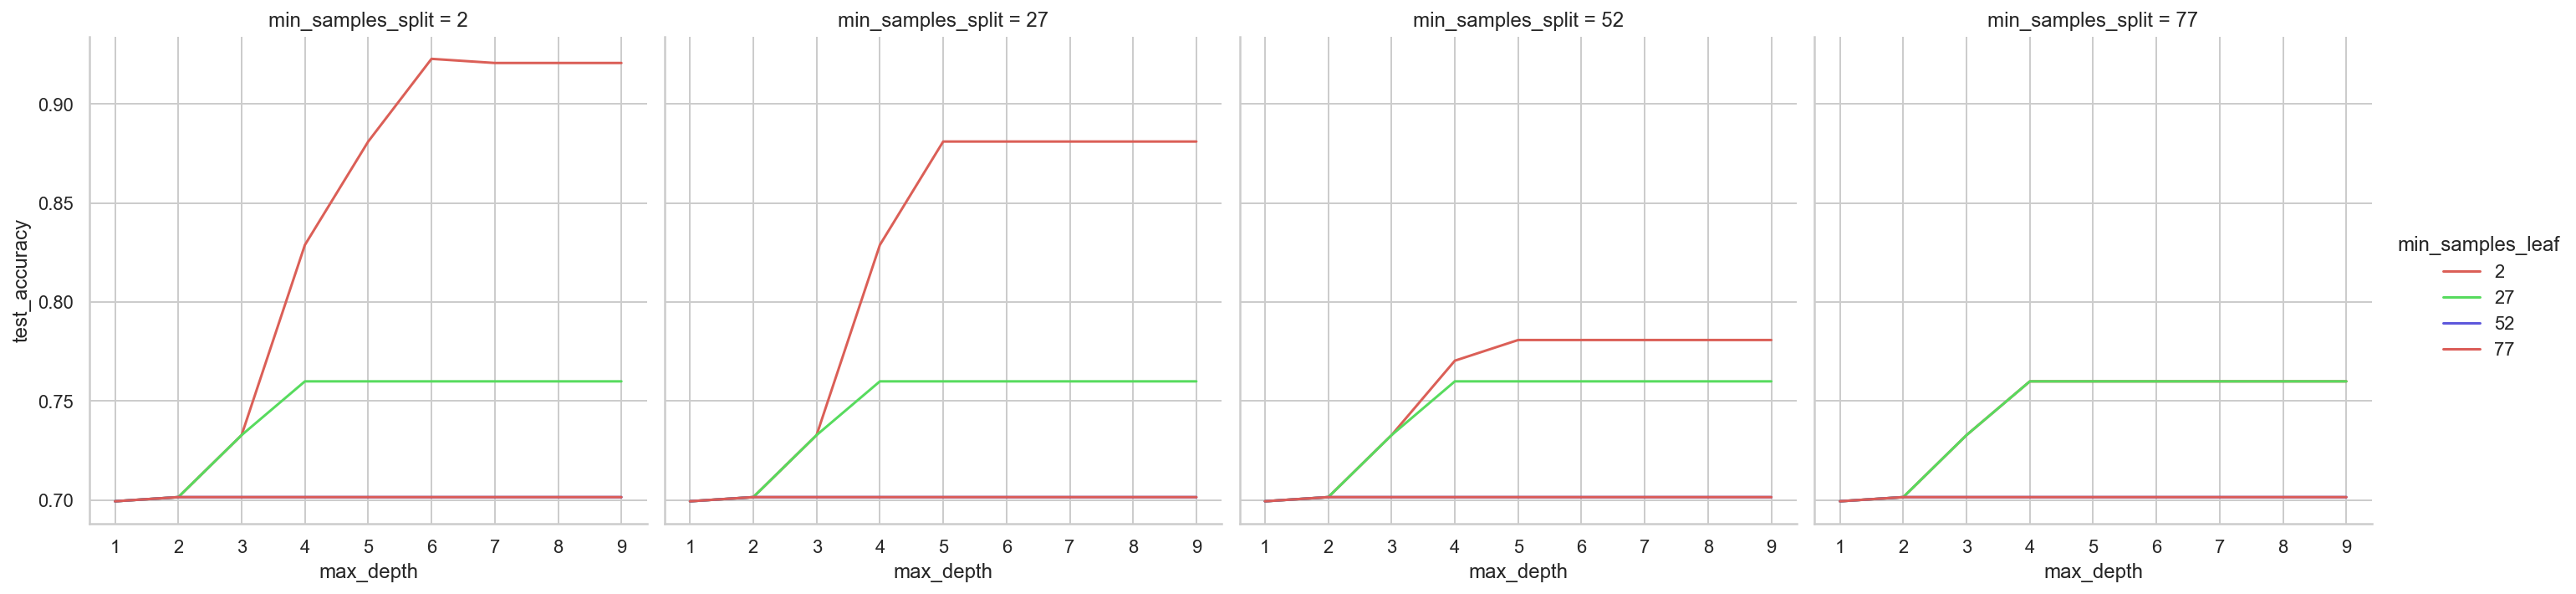

In [103]:
sns.relplot(data=output, 
            x = 'max_depth', y = 'test_accuracy', 
            kind = 'line', col = 'min_samples_split', 
            hue='min_samples_leaf',palette = 'hls',
            facet_kws={'sharey': True, 'sharex': True})

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [99]:
def Fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return Fibonacci(n-1) + Fibonacci(n-2)
Fibonacci(20)

6765